<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [154]:
df_test = pd.read_csv("agricultural_yield_test.csv")
df_test

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374
...,...,...,...,...,...,...,...
3995,95.094714,1,124.108262,98.970659,496.705800,5,802.209345
3996,53.256984,0,100.310322,111.448947,667.056391,8,509.646540
3997,94.145522,1,196.473704,110.003474,458.241408,3,776.013634
3998,61.452120,1,80.618357,97.815517,778.652540,4,502.319484


In [155]:
df_train = pd.read_csv("agricultural_yield_train.csv")
df_train

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665
...,...,...,...,...,...,...,...
15995,77.053550,1,154.189768,103.115855,319.915079,7,956.781949
15996,99.795631,1,282.295839,123.598354,647.292136,4,879.682714
15997,67.478487,1,120.017122,102.308627,514.372747,8,932.829561
15998,85.176890,1,247.847389,114.956634,695.035801,6,889.738438


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [156]:
df_train["Seed_Variety"] = df_train["Seed_Variety"].astype("category")

In [157]:
df_train

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665
...,...,...,...,...,...,...,...
15995,77.053550,1,154.189768,103.115855,319.915079,7,956.781949
15996,99.795631,1,282.295839,123.598354,647.292136,4,879.682714
15997,67.478487,1,120.017122,102.308627,514.372747,8,932.829561
15998,85.176890,1,247.847389,114.956634,695.035801,6,889.738438


In [158]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Soil_Quality                      16000 non-null  float64 
 1   Seed_Variety                      16000 non-null  category
 2   Fertilizer_Amount_kg_per_hectare  16000 non-null  float64 
 3   Sunny_Days                        16000 non-null  float64 
 4   Rainfall_mm                       16000 non-null  float64 
 5   Irrigation_Schedule               16000 non-null  int64   
 6   Yield_kg_per_hectare              16000 non-null  float64 
dtypes: category(1), float64(5), int64(1)
memory usage: 765.9 KB


In [159]:
num_columns = df_train.select_dtypes(include=['float64', 'int64']).columns # выбираем числвоые колонки
cat_columns  = df_train.select_dtypes(include=['category']).columns #

C:\Users\vpopv\AppData\Local\Temp\ipykernel_11588\2421337887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


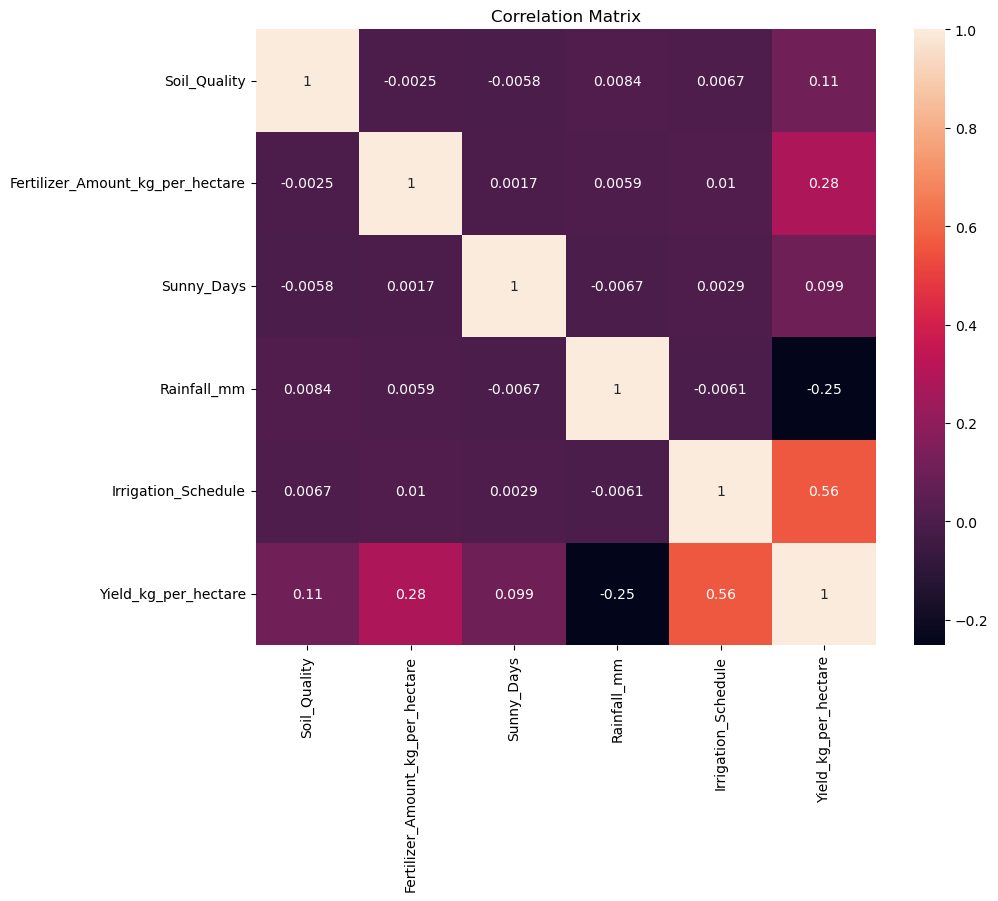

In [160]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

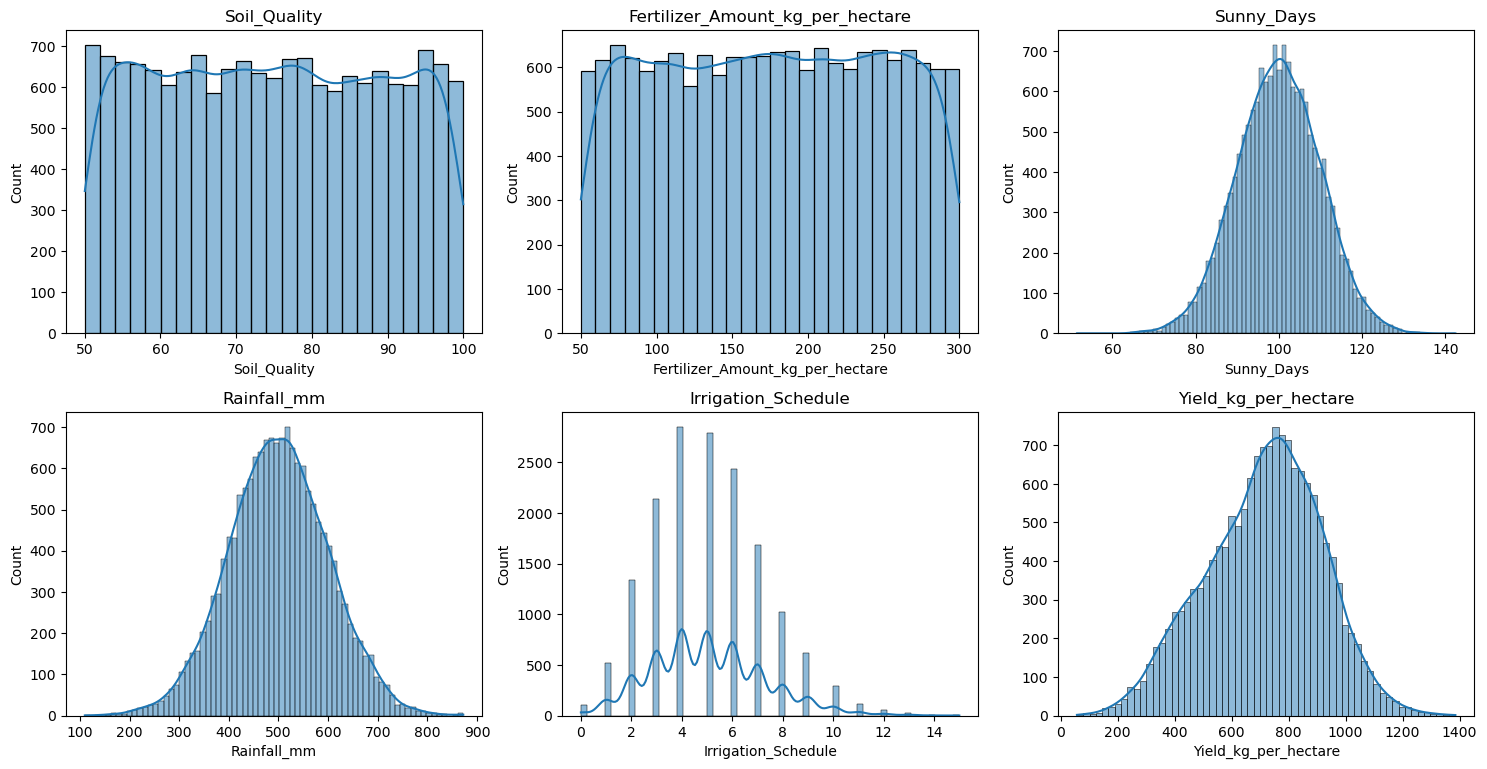

In [161]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_train[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<Axes: >

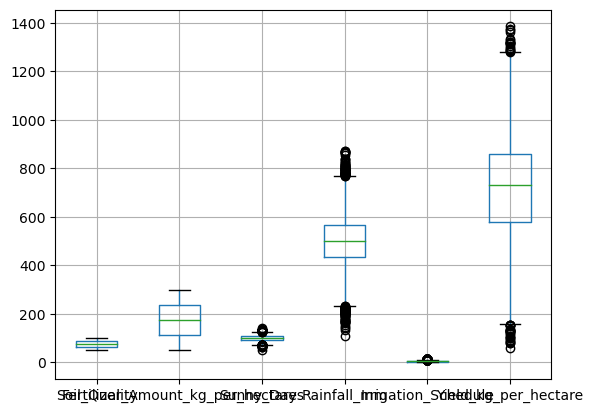

In [162]:
df_train.boxplot()

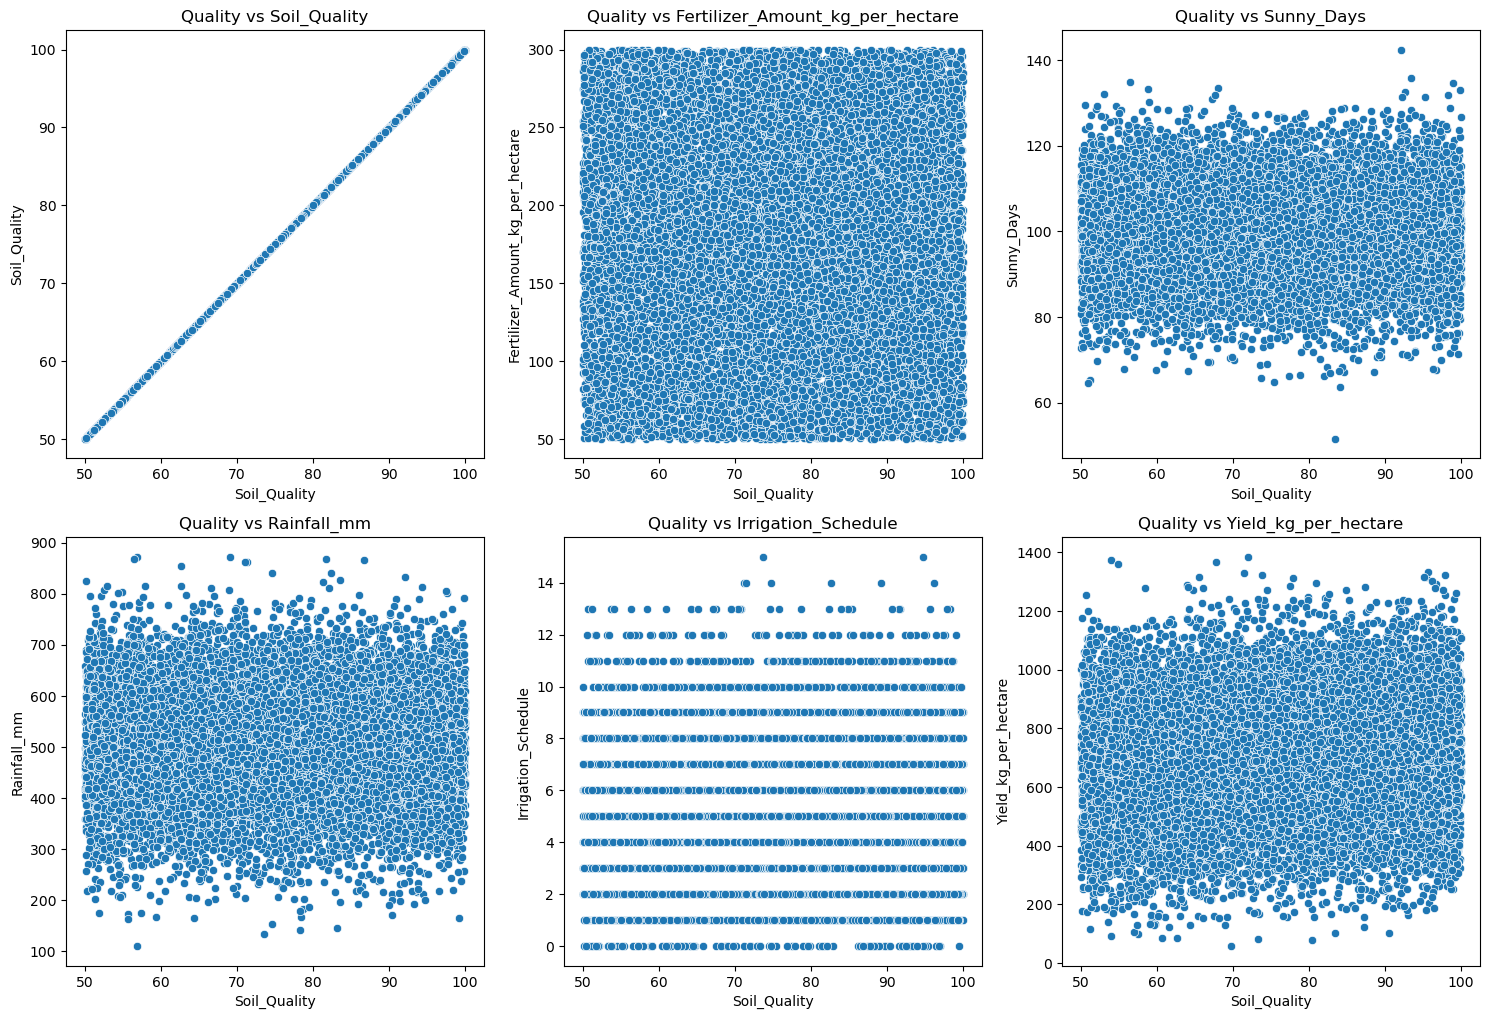

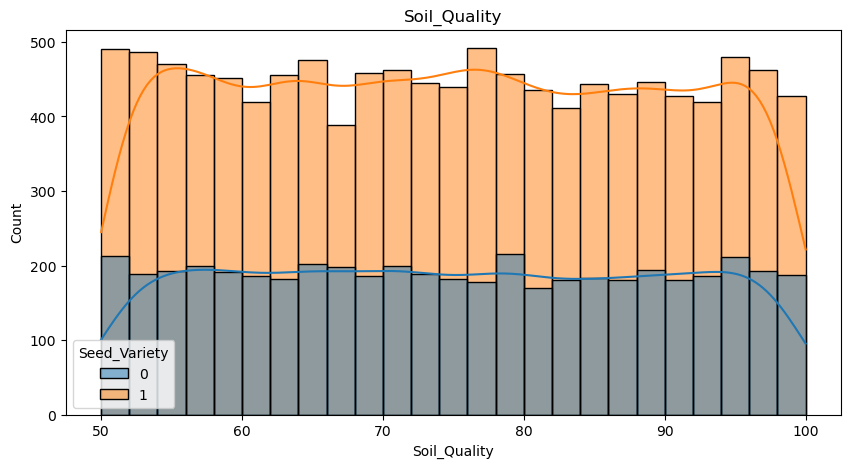

In [163]:
plt.figure(figsize=(15, 20))

# Создание диаграмм рассеивания для каждой числовой переменной относительно алкоголя
for i, column in enumerate(num_columns, 1):  # Исключаем 'alcohol' из цикла
    plt.subplot(4, 3, i)
    sns.scatterplot(data=df_train, x='Soil_Quality', y=column)
    plt.title(f'Quality vs {column}')

plt.tight_layout()
plt.show()

# Histplot для переменной алкоголь
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='Soil_Quality', hue='Seed_Variety', kde=True)
plt.title('Soil_Quality')
plt.show()

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [164]:
df_train.columns

Index(['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare',
       'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule',
       'Yield_kg_per_hectare'],
      dtype='object')

In [165]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def transform_dataframe(df):
    # Проверка на наличие необходимых столбцов
    required_columns = ['Seed_Variety', 'Fertilizer_Amount_kg_per_hectare','Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule','Yield_kg_per_hectare']
    if not all(column in df.columns for column in required_columns):
        raise ValueError("DataFrame must contain the required columns.")

    # Создание копии DataFrame, чтобы не изменять исходный df
    df_transformed = df.copy()

    # Преобразование первых четырех признаков с помощью StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_transformed[required_columns[1:]])

    # Преобразование 'ph_bins' с помощью pd.get_dummies
    seed_dummies = pd.get_dummies(df_transformed['Seed_Variety'], prefix='seed')

    # Объединение масштабированных признаков и dummy переменных
    df_transformed = pd.DataFrame(scaled_features, columns=required_columns[1:])
    df_transformed = pd.concat([df_transformed, seed_dummies], axis=1)

    return df_transformed

df_research = transform_dataframe(df_train[['Seed_Variety', 'Fertilizer_Amount_kg_per_hectare','Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule','Yield_kg_per_hectare']])
pd.concat([df_research, df_train['Soil_Quality'], ], axis=1)

,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare,seed_0,seed_1,Soil_Quality
0,-0.379691,-0.534440,-0.562263,-0.911955,-0.149554,0,1,96.415657
1,1.478208,-0.944175,0.170481,0.882073,-0.174501,1,0,92.352626
2,-0.518473,-0.260358,-0.801688,1.330580,1.091430,0,1,63.714785
3,-1.031443,1.350364,0.472624,0.882073,0.948756,0,1,90.084256
4,0.665692,-1.691294,-0.657619,0.433566,0.907917,0,1,81.600341
...,...,...,...,...,...,...,...,...
15995,-0.291644,0.319436,-1.805051,0.882073,1.200676,0,1,77.053550
15996,1.488357,2.371729,1.466779,-0.463448,0.819383,0,1,99.795631
15997,-0.766464,0.238554,0.138373,1.330580,1.082220,0,1,67.478487
15998,1.009705,1.505851,1.943933,0.433566,0.869113,0,1,85.176890


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [166]:
y = df_train['Soil_Quality']
X = df_research

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [168]:
def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [169]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 11.180314284765569,
 'MSE': 175.10971285613437,
 'R2': 0.167063059095777,
 'mape (reverted - % верно угаданых)': 84.22640049419618,
 'mape (original - % ошибок)': 15.773599505803809}

In [170]:
model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 11.296791013131946,
 'MSE': 178.4267200312392,
 'R2': 0.16792314236635275,
 'mape (reverted - % верно угаданых)': 83.91843670810184,
 'mape (original - % ошибок)': 16.081563291898156}

In [171]:
df_research.columns

Index(['Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm',
       'Irrigation_Schedule', 'Yield_kg_per_hectare', 'seed_0', 'seed_1'],
      dtype='object')

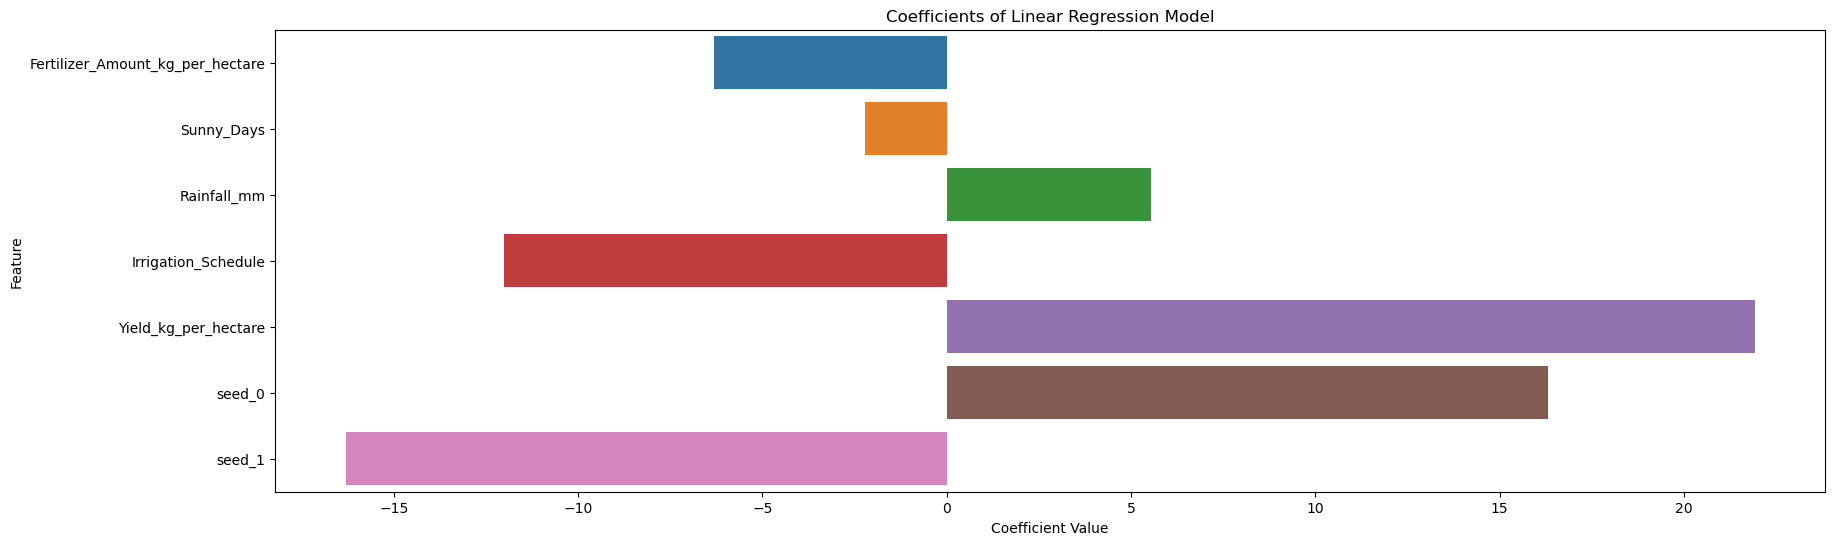

In [172]:
# Получение коэффициентов линейной регрессии
coefficients = model.coef_

# Названия признаков
feature_names = ['Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm','Irrigation_Schedule', 'Yield_kg_per_hectare', 'seed_0', 'seed_1']

# Визуализация коэффициентов
plt.figure(figsize=(20, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [174]:
import numpy as np
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances

def knn_regressor(X_train, y_train, X_test, k=5):
    """
    Простая реализация KNN регрессии.

    Параметры:
    X_train: np.array - обучающий набор признаков
    y_train: np.array - обучающий набор целевой переменной
    X_test: np.array - тестовый набор признаков
    k: int - количество соседей

    Возвращает:
    y_pred: np.array - предсказанные значения для тестового набора
    """

    # Рассчитываем метрику расстояния (для примера - Евклидово расстояние)
    #от каждой тестовой точки до всех точек обучающего набора
    distances = euclidean_distances(X_test, X_train)

    # Инициализация массива для предсказаний
    y_pred = np.zeros(len(X_test))

    # Цикл по всем тестовым точкам
    for i in range(0, len(X_test)):
      test_point = X_test.iloc[i].to_numpy()
      neighbors = np.argsort(distances[i])[:k]
      y_pred[i] = np.mean(y_train[neighbors])

    return y_pred

# Пример использования функции:
# X_train, y_train, X_test уже должны быть определены


y_pred = knn_regressor(X_train, y_train.to_numpy(), X_test, k=3)
compute_metrics(y_test, y_pred)

{'MAE': 13.18124706148505,
 'MSE': 252.5035024603981,
 'R2': -0.17752722704286072,
 'mape (reverted - % верно угаданых)': 81.30371976815584,
 'mape (original - % ошибок)': 18.696280231844153}

In [175]:
pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})

,y_pred,y_test
8756,78.837106,91.977121
4660,70.558774,73.832939
6095,68.480608,98.646681
304,77.445211,69.313868
8241,82.605367,97.912353
...,...,...
15578,79.687050,74.295729
5746,75.411530,68.663292
6395,64.636228,96.953918
7624,88.134140,97.271008


##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [146]:
import numpy as np

In [147]:
"""
Результат работы
"""


class LinearRegression():

    # Initiating the parameters.
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):

        self.m = len(y)
        self.X = np.c_[np.ones(self.m), X]  # добавляем колонку для intercept
        self.theta = np.zeros(X.shape[1])
        self.prev_theta = np.zeros(X.shape[1])
        self.unchanged_count = 0

        for iteration in range(self.max_iter):
            self.gradients = -2/self.m * X.T.dot(y - X.dot(self.theta))
            self.prev_theta = self.theta.copy()
            self.theta -= self.learning_rate * self.gradients

            # Проверка на изменение коэффициентов
            # Упрощенный пример реализации
            # нейросетевого early_stopping https://keras.io/api/callbacks/early_stopping/
            if np.allclose(self.prev_theta, self.theta):
                self.unchanged_count += 1
            else:
                self.unchanged_count = 0

            if self.unchanged_count >= 5:
                break
        return self

    def predict(self, X):
        return X.dot(self.theta)

In [150]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_train)
compute_metrics(y_train, y_predict)

{'MAE': 12.65815252944003,
 'MSE': 214.7519284892794,
 'R2': -0.021501385911710136,
 'mape (reverted - % верно угаданых)': 82.18030270481977,
 'mape (original - % ошибок)': 17.819697295180234}

In [178]:
from sklearn.metrics.pairwise import euclidean_distances

class Knn():
    def __init__(self,k=5):
        self.k = k
    def fit(self,X,y):
        self.x_test = X
        self.y = y.to_numpy()
        return self
    def predict(self,X):
        self.distances = euclidean_distances(self.x_test,X)
        self.y_pred = np.zeros(len(X))
        
        for i in range(0, len(X)):
            self.test_point = X.iloc[i].to_numpy()
            self.neighbours = np.argsort(self.distances[i])[:self.k]
            self.y_pred[i] = np.mean(self.y[self.neighbours])
        return self.y_pred

In [179]:
model_knn = Knn()
model_knn = model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_train)
compute_metrics(y_train, y_pred_knn)

{'MAE': 10.234607359458517,
 'MSE': 149.86646370538708,
 'R2': 0.2871365512120083,
 'mape (reverted - % верно угаданых)': 85.57582734494763,
 'mape (original - % ошибок)': 14.42417265505237}

In [180]:
pd.DataFrame({'y_pred': y_pred_knn, 'y_test': y_train})

,y_pred,y_test
676,81.194872,71.973675
12113,85.584607,91.058478
7077,65.045335,57.132789
13005,67.384526,81.645856
12123,71.374921,55.915677
...,...,...
13418,84.783926,90.776191
5390,76.770681,80.474310
860,75.565244,82.322796
15795,82.696992,86.729005
